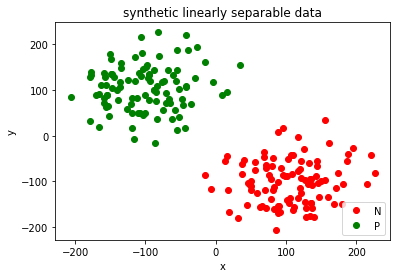

In [0]:
import numpy as np
######################
# Create random data
#####################
random_positive = np.random.normal(100,45,100)
random_negative = np.random.normal(-100,45,100)

N=[(x,y) for x,y in zip(random_positive,random_negative)] 
N_O = np.full(100, -1)

P=[(x,y) for x,y in zip(random_negative,random_positive)]
P_O = np.full(100, 1)


X = np.concatenate([N, P])
d = np.concatenate([N_O, P_O])

########################
# Data Visualization
########################
import matplotlib.pyplot as plt
plt.plot([x for x,y in N], [y for x,y in N], 'ro', label='N')
plt.plot([x for x,y in P], [y for x,y in P], 'go', label='P')

plt.title('synthetic linearly separable data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

plt.show()

ساده ترین مدل شبکه مک کلاچ هست ولی کد زیر با یک شبکه یک لایه ورودی را میگیرد و ماتریس وزن ها را با استفاده از مشتق آپدیت میکند


In [0]:
from numpy import exp, array, random, dot, tanh 

class NeuralNetwork(): 
	
	def __init__(self): 
		 
		random.seed(1997) 
		self.weight_matrix = random.random((2, 1))
		self.af_name = 'sigmoid'
	 
	def relu(self, x):
		return x if x>0 else 0

	def tanh(self, x): 
		return tanh(x) 
	
	def sigmoid(self, x):
		return 1/(1 + np.exp(-x))

	def elu(self, x,alpha):
		return x if x >= 0 else alpha*(e^x -1)

	def elu_derivative(self, x,alpha):
		return 1 if x > 0 else alpha*np.exp(x)
 
	def tanh_derivative(self, x): 
		return 1.0 - self.tanh(x) ** 2

	def sigmoid_derivative(self, x):
		f = 1/(1 + np.exp(-x))
		return f * (1 - f)
	
	def relu_derivative(x):
		return 1 if x > 0 else 0

	def activation_function(self,name,x):
		if self.name == 'relu':
			return self.relu(x)
		elif self.name == 'tanh':
			return self.tanh(x)
		elif self.name == 'sigmoid':
			return self.sigmoid(x)

	def get_derivative(self, x):
		if self.name == 'relu':
			return self.relu_derivative(x)
		elif self.name == 'tanh':
			return self.tanh_derivative(x)
		elif self.name == 'sigmoid':
			return self.sigmoid_derivative(x)
	 
	def forward_propagation(self,name, inputs):
		self.name = name
		return self.activation_function(name, dot(inputs, self.weight_matrix)) 
	
	# training the neural network. 
	def train(self,name, train_inputs, train_outputs,	epoch): 
		self.name = name						
		for iteration in range(epoch): 
			output = self.forward_propagation(name, train_inputs) 

			error = train_outputs - output 

			adjustment = dot(train_inputs.T, error *
							self.get_derivative(output)) 
							
			self.weight_matrix += adjustment 

با استفاده از چندین تابع فعال ساز وبه عنوان ورودی و نقطه مورد نظر پیش بینی انجام میشود


In [0]:
	neural_network = NeuralNetwork() 
	
	print ('Random weights at the start of training') 
	print (neural_network.weight_matrix) 

	train_inputs = array(X) 
	train_outputs = array([d]).T 

	neural_network.train('tanh', train_inputs, train_outputs, 100000) 

	print ('New weights after training') 
	print (neural_network.weight_matrix) 

	print ("Testing network on new examples ->") 
	print (neural_network.forward_propagation('tanh', array([-50, -100]))) 

Random weights at the start of training
[[0.77114815]
 [0.07475717]]
New weights after training
[[-17281.29350289]
 [ 16646.51571836]]
Testing network on new examples ->
[-1.]
